<a href="https://colab.research.google.com/github/ajayks1974/learning/blob/master/cv/ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=4a48aea7b8e2cbe2807426acb1801971a87b87e90974411f7d672338a1d02918
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,849 kB/s)
debconf: unable to initi

In [3]:
import cv2

In [4]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [91]:
image_path_in_colab="asetu4.jpg"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

In [97]:
img = cv2.imread("asetu4.jpg")

In [98]:
img.shape

(70, 257, 3)

In [99]:
import matplotlib.pyplot as plt

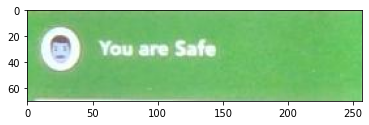

In [100]:
plt.imshow(img)

In [101]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

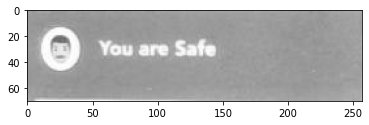

In [102]:
#plt.imshow(gray)
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)

In [103]:
gray.shape

(70, 257)

In [104]:
from skimage import color
from skimage import io

In [105]:
#img = color.rgb2gray(io.imread('asetu.jpg'))

In [106]:
#plt.imshow(img)

In [107]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)

In [108]:
print(ret)

195.0


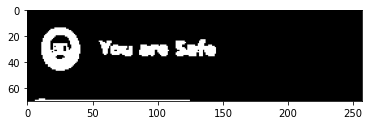

In [109]:
#plt.imshow(thresh1)
plt.imshow(thresh1, cmap="gray", vmin=0, vmax=255)

# New section

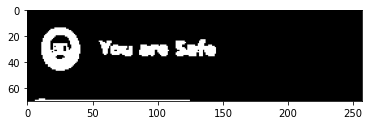

In [110]:
#plt.imshow(thresh1)
plt.imshow(thresh1, cmap="gray", vmin=0, vmax=255)

In [111]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) 

In [112]:
#dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

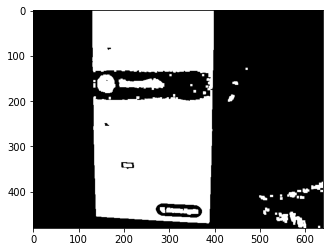

In [113]:
#plt.imshow(thresh1)
plt.imshow(dilation, cmap="gray", vmin=0, vmax=255)

In [114]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE) 

In [115]:
im2 = img.copy()

In [116]:
file = open("recognized1.txt", "w+") 
file.write("Test") 
file.close() 

In [117]:
iter=0
for cnt in contours:
    iter+=1
    print(iter)
    x, y, w, h = cv2.boundingRect(cnt)
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 0, 0), 2) 
    cropped = im2[y:y + h, x:x + w] 
    file = open("recognized1.txt", "a")
    text = pytesseract.image_to_string(cropped)
    print(text)
    file.write(text)
    file.write("\n")
    file.close

1

2

3

4

5



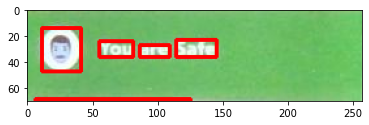

In [118]:
plt.imshow(im2)

(array([128, 128, 128, 129, 129, 129, 129, 129, 130]), array([131, 132, 133, 130, 131, 132, 133, 134, 132]))


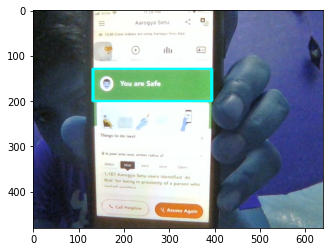

In [138]:
#Template Matching based Method
import numpy as np
import cv2
# Read the main image
img_rgb = cv2.imread('asetu3.jpg')
# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# Read the template
template = cv2.imread('asetu5.jpg',0)
# Store width and height of template in w and h
w, h = template.shape[::-1]
# Perform match operations.
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)
# Specify a threshold
threshold = 0.8
# Store the coordinates of matched area in a numpy array
loc = np.where( res >= threshold)
print(loc)
# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
# Show the final image with the matched area.
plt.imshow(img_rgb)

In [139]:
# read images
img1 = cv2.imread('asetu5.jpg')  
img2 = cv2.imread('asetu3.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

error: ignored